# 01 - Data Exploration

**Purpose:** Load and explore sample data from Valheim WorldGenerator

**Scope:**
- Load sample JSON file
- Display basic statistics
- Visualize raw biome distribution
- Analyze height distribution
- Create spatial overview maps

**Prerequisites:**
- Sample data file: `../output/samples/*-samples-1024.json`

**Outputs:**
- Summary statistics
- Raw biome distribution pie chart
- Height histogram
- Spatial heatmap

**Estimated Time:** 5 minutes

## Setup

In [2]:
# Standard imports
import sys
sys.path.append('.')  # Ensure local imports work

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Local utilities
from biome_utils import *
from config import *

# Jupyter display settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("✓ Setup complete")

✓ Setup complete


## Load Data

In [3]:
# Update this path to your sample file
SAMPLE_PATH = '../output/samples/hkLycKKCMI-samples-1024.json'

# Alternative: Use file picker
# sample_files = list(Path('../output/samples/').glob('*-samples-1024.json'))
# if sample_files:
#     SAMPLE_PATH = str(sample_files[0])
#     print(f"Auto-selected: {SAMPLE_PATH}")

# Load samples
df = load_samples(SAMPLE_PATH)

# Display first few rows
df.head()

Loading samples from: ../output/samples/hkLycKKCMI-samples-1024.json
✓ Loaded 1,048,576 samples
✓ World: hkLycKKCMI
✓ Resolution: 1024×1024


X           Z  Biome  Height      Distance
0 -10000.0 -10000.0000     32  -400.0  14142.135624
1 -10000.0  -9980.4690     32  -400.0  14128.331871
2 -10000.0  -9960.9375     32  -400.0  14114.541292
3 -10000.0  -9941.4060     32  -400.0  14100.764279
4 -10000.0  -9921.8750     32  -400.0  14087.001225

## Summary Statistics

In [4]:
# Print comprehensive summary
print_summary_stats(df)


SAMPLE DATA SUMMARY

World: hkLycKKCMI
Resolution: 1024×1024
Total Samples: 1,048,576

Coordinate Bounds:
  X: -10000.0 to 9980.5
  Z: -10000.0 to 9980.5
  Height: -400.0 to 460.9
  Max Distance: 14142.1m

Biome Distribution:
  DeepNorth        325,837 (31.07%)
  Ocean            188,798 (18.01%)
  Ashlands         163,766 (15.62%)
  Mountain         151,298 (14.43%)
  Plains            77,111 ( 7.35%)
  Mistlands         57,684 ( 5.50%)
  Swamp             31,133 ( 2.97%)
  Meadows           28,086 ( 2.68%)
  BlackForest       24,863 ( 2.37%)



In [5]:
# DataFrame info
print("DataFrame Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   X         1048576 non-null  float64
 1   Z         1048576 non-null  float64
 2   Biome     1048576 non-null  int64  
 3   Height    1048576 non-null  float64
 4   Distance  1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Descriptive Statistics:
                  X             Z         Biome        Height      Distance
count  1.048576e+06  1.048576e+06  1.048576e+06  1.048576e+06  1.048576e+06
mean  -9.765625e+00 -9.765625e+00  1.713202e+02 -4.112999e+01  7.651963e+03
std    5.773503e+03  5.773503e+03  1.799836e+02  1.568411e+02  2.848555e+03
min   -1.000000e+04 -1.000000e+04  1.000000e+00 -4.000000e+02  0.000000e+00
25%   -5.004883e+03 -5.004883e+03  1.600000e+01  0.000000e+00  5.642132e+03
50%   -9.765625e+00 -9.765625e+00  6.400000e+01 

## Biome Distribution

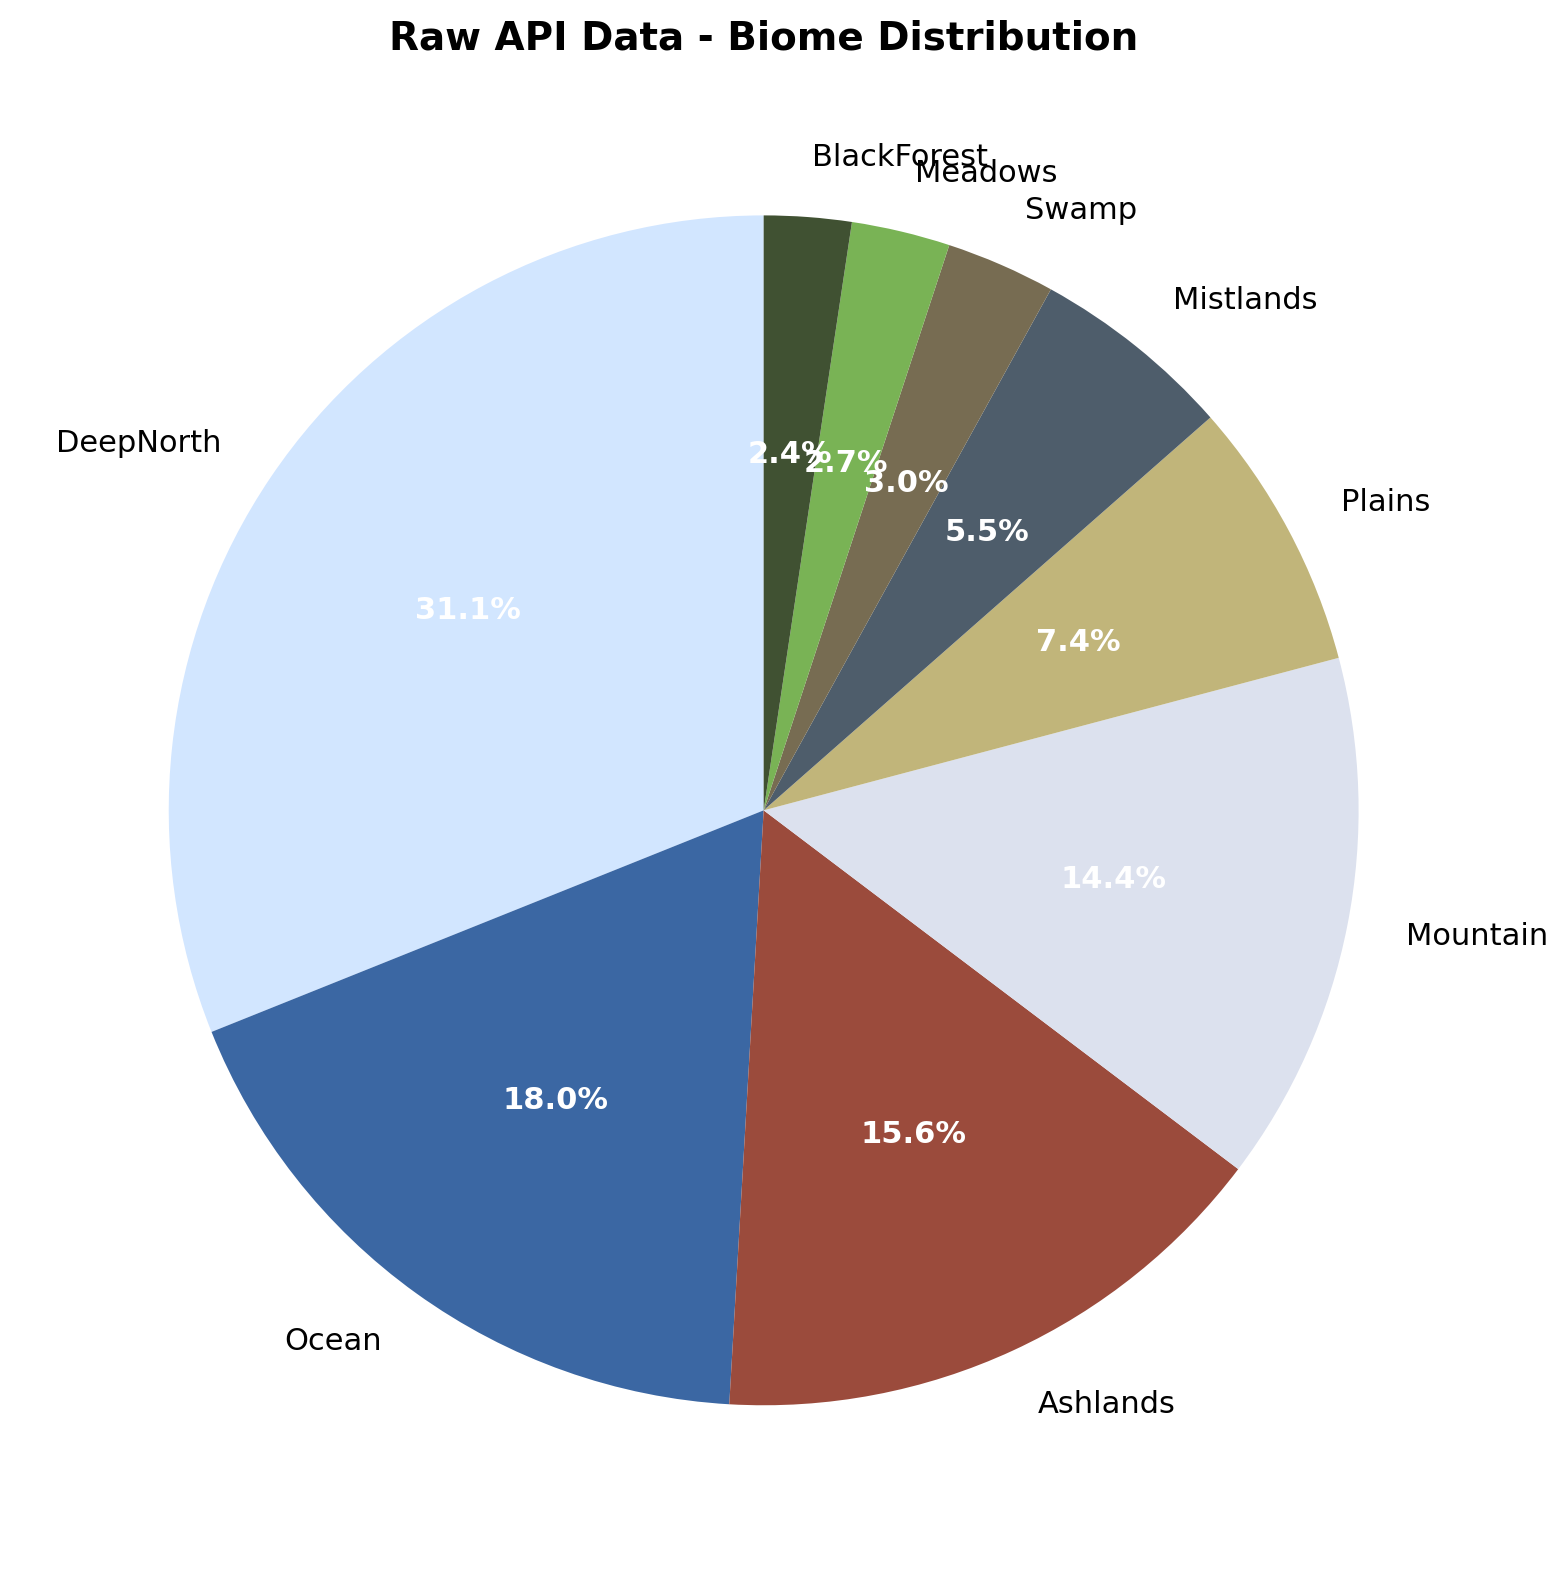

In [6]:
# Raw biome distribution (pie chart)
fig = plot_biome_distribution(df, "Raw API Data - Biome Distribution")
plt.show()

In [7]:
# Detailed statistics table
stats = calculate_biome_distribution(df)

stats_df = pd.DataFrame(stats).T
stats_df = stats_df.sort_values('percentage', ascending=False)
print("\nBiome Distribution Table:")
print(stats_df[['count', 'percentage']].to_string())


Biome Distribution Table:
                count  percentage
DeepNorth    325837.0   31.074238
Ocean        188798.0   18.005180
Ashlands     163766.0   15.617943
Mountain     151298.0   14.428902
Plains        77111.0    7.353878
Mistlands     57684.0    5.501175
Swamp         31133.0    2.969074
Meadows       28086.0    2.678490
BlackForest   24863.0    2.371120


## Height Distribution

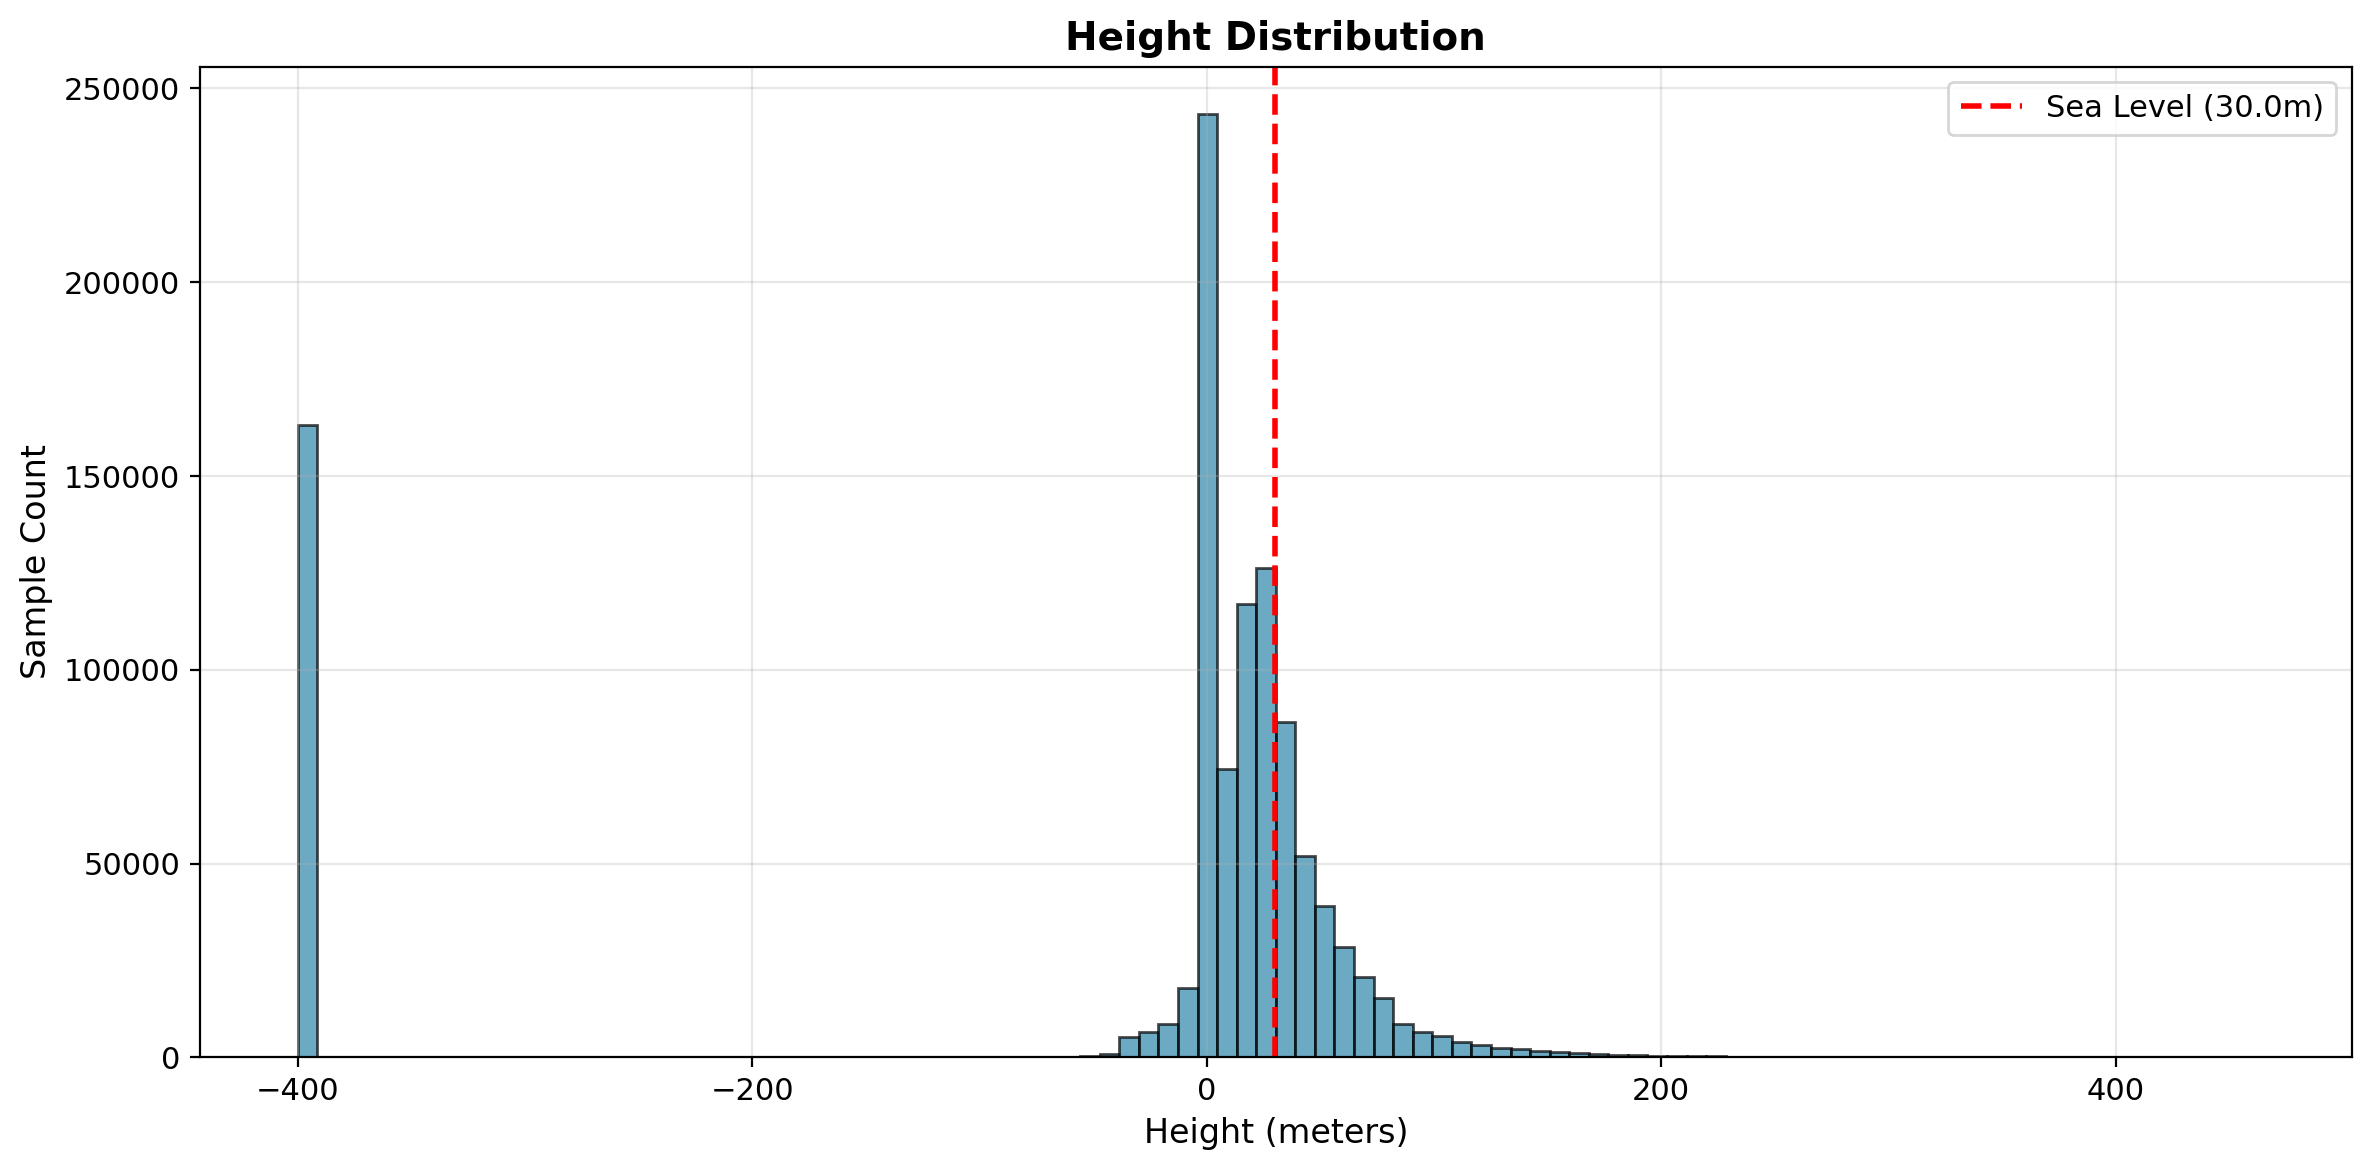

In [8]:
# Height histogram
fig = plot_height_histogram(df, bins=100)
plt.show()

In [9]:
# Height statistics by zone
print("Height Statistics:")
print(f"  Min: {df['Height'].min():.1f}m")
print(f"  Max: {df['Height'].max():.1f}m")
print(f"  Mean: {df['Height'].mean():.1f}m")
print(f"  Median: {df['Height'].median():.1f}m")

print(f"\nSamples below sea level ({SEA_LEVEL_METERS}m): {(df['Height'] < SEA_LEVEL_METERS).sum():,} ({(df['Height'] < SEA_LEVEL_METERS).sum() / len(df) * 100:.1f}%)")
print(f"Samples above sea level: {(df['Height'] >= SEA_LEVEL_METERS).sum():,} ({(df['Height'] >= SEA_LEVEL_METERS).sum() / len(df) * 100:.1f}%)")

Height Statistics:
  Min: -400.0m
  Max: 460.9m
  Mean: -41.1m
  Median: 13.4m

Samples below sea level (30.0m): 755,394 (72.0%)
Samples above sea level: 293,182 (28.0%)


## Spatial Overview

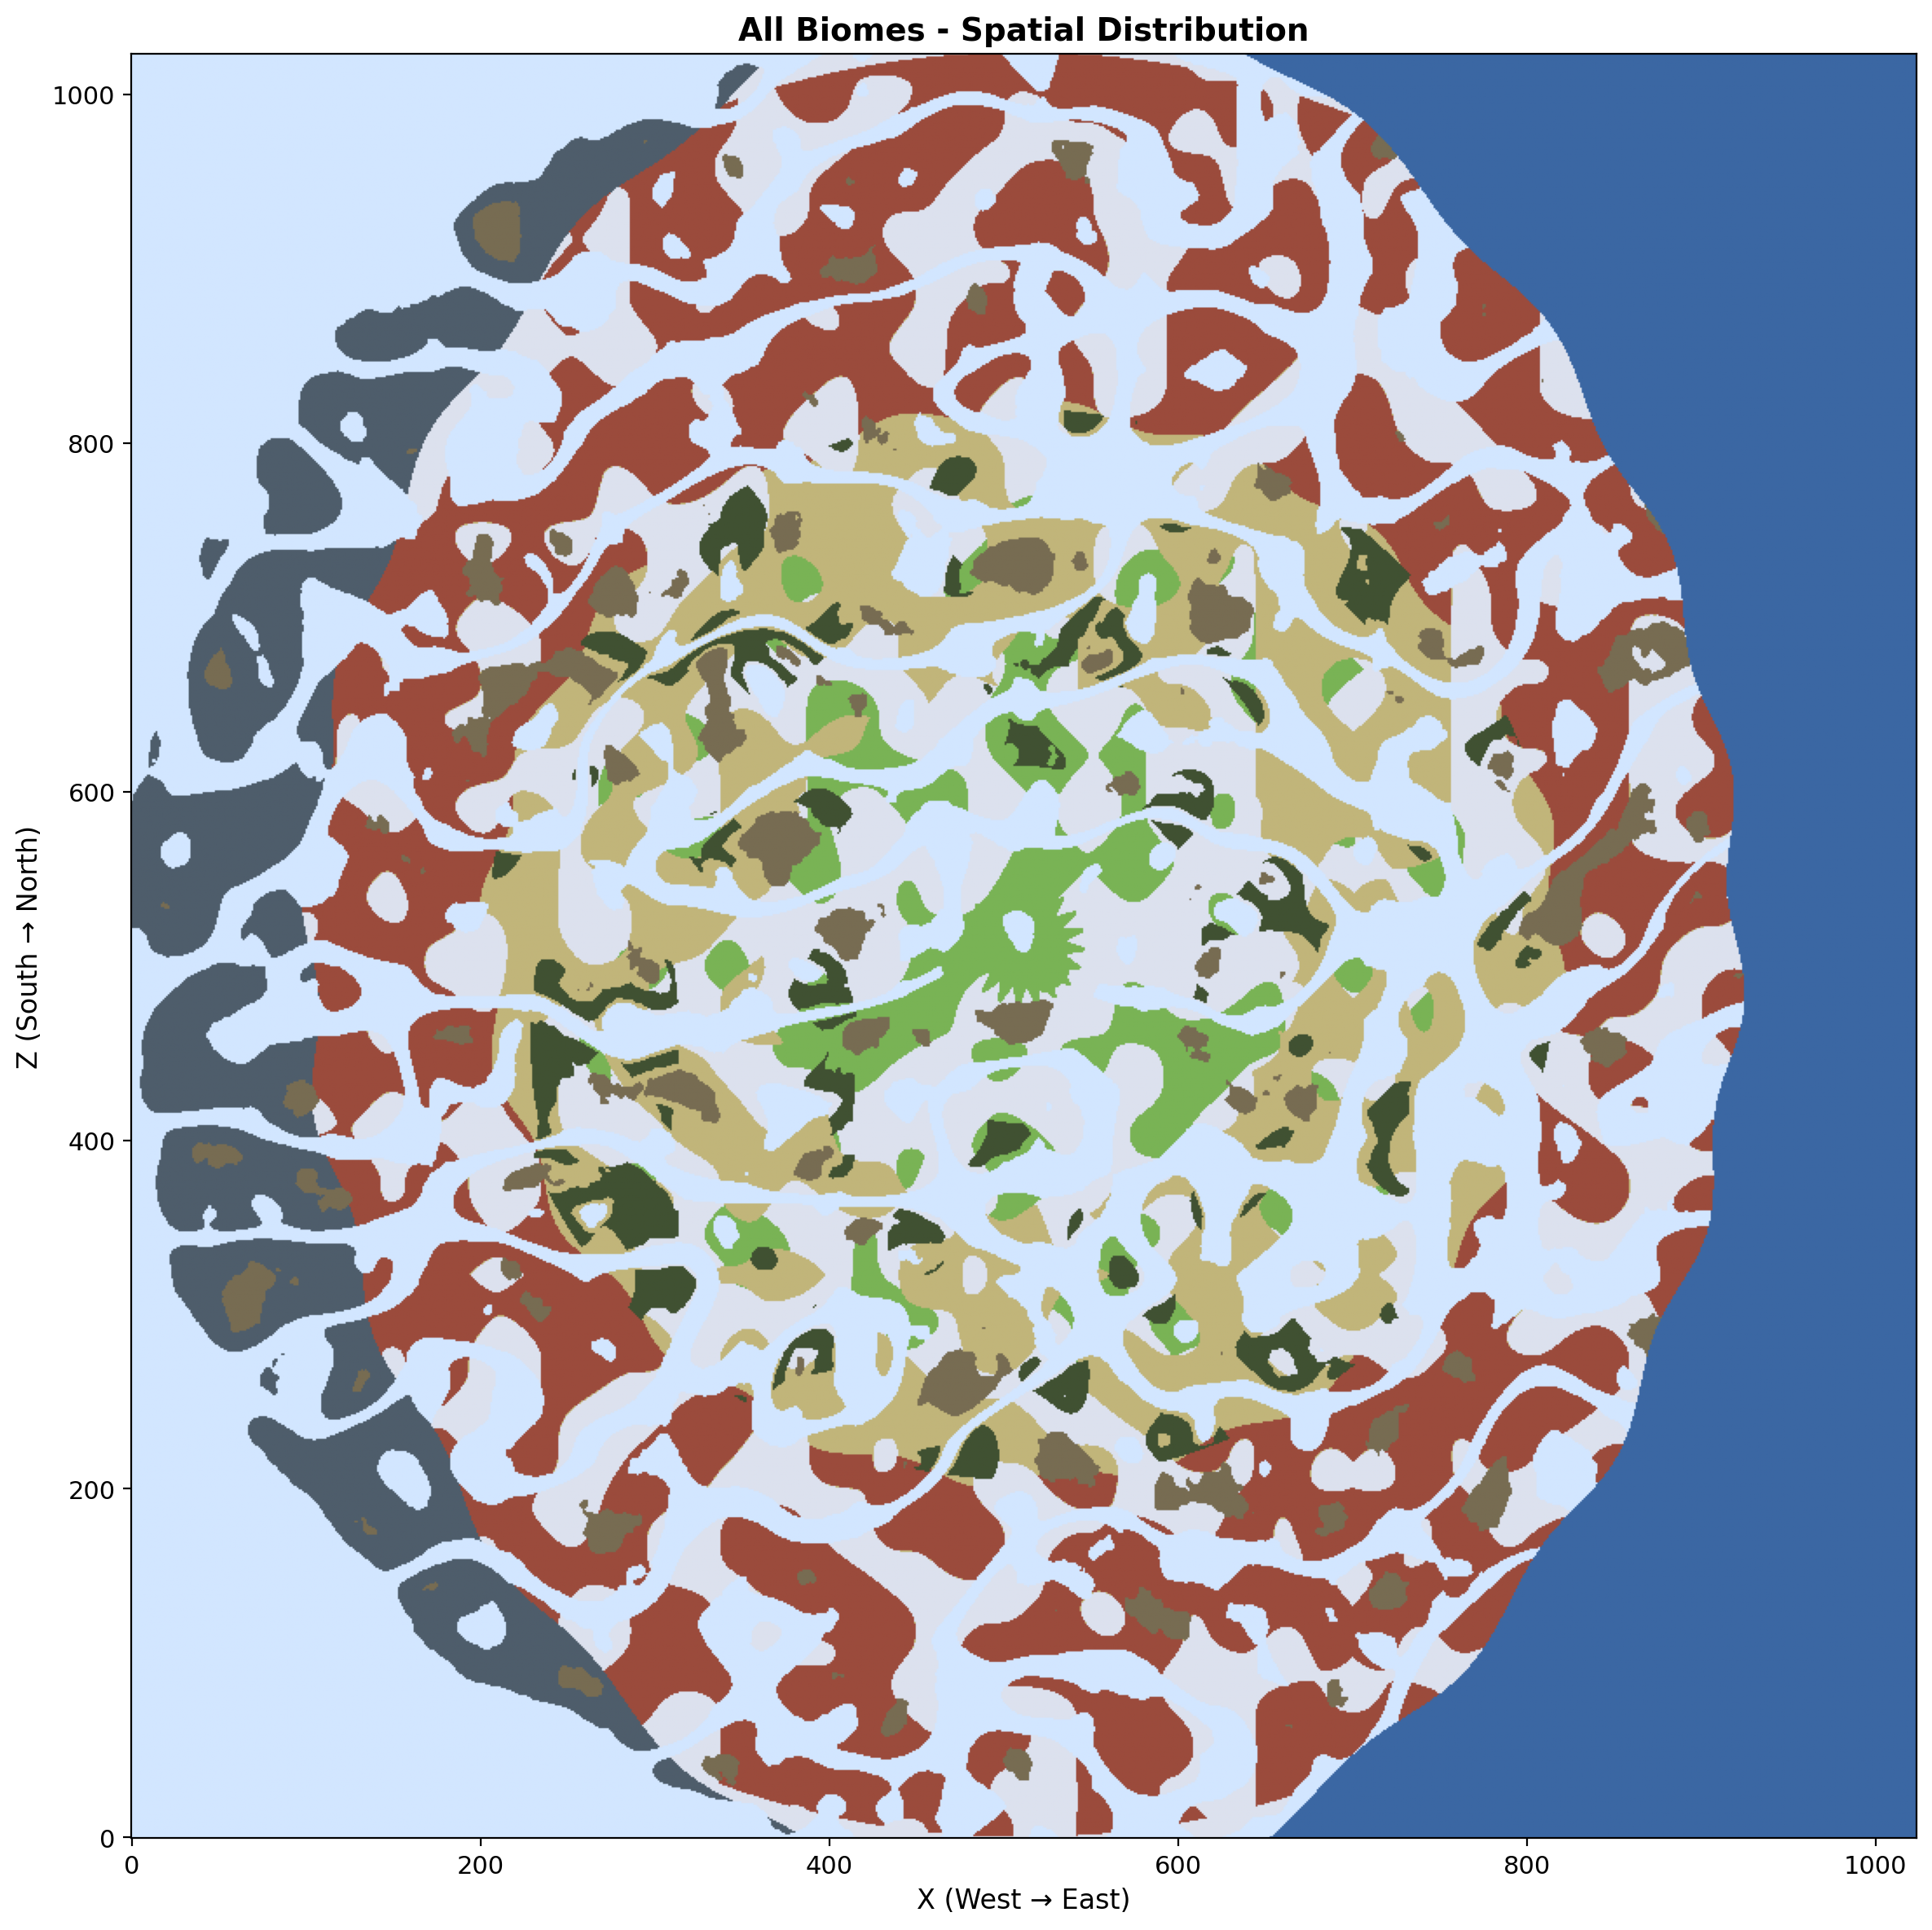

In [10]:
# All biomes spatial heatmap
fig = plot_spatial_heatmap(df, title="All Biomes - Spatial Distribution")
plt.show()

## Distance Ring Analysis

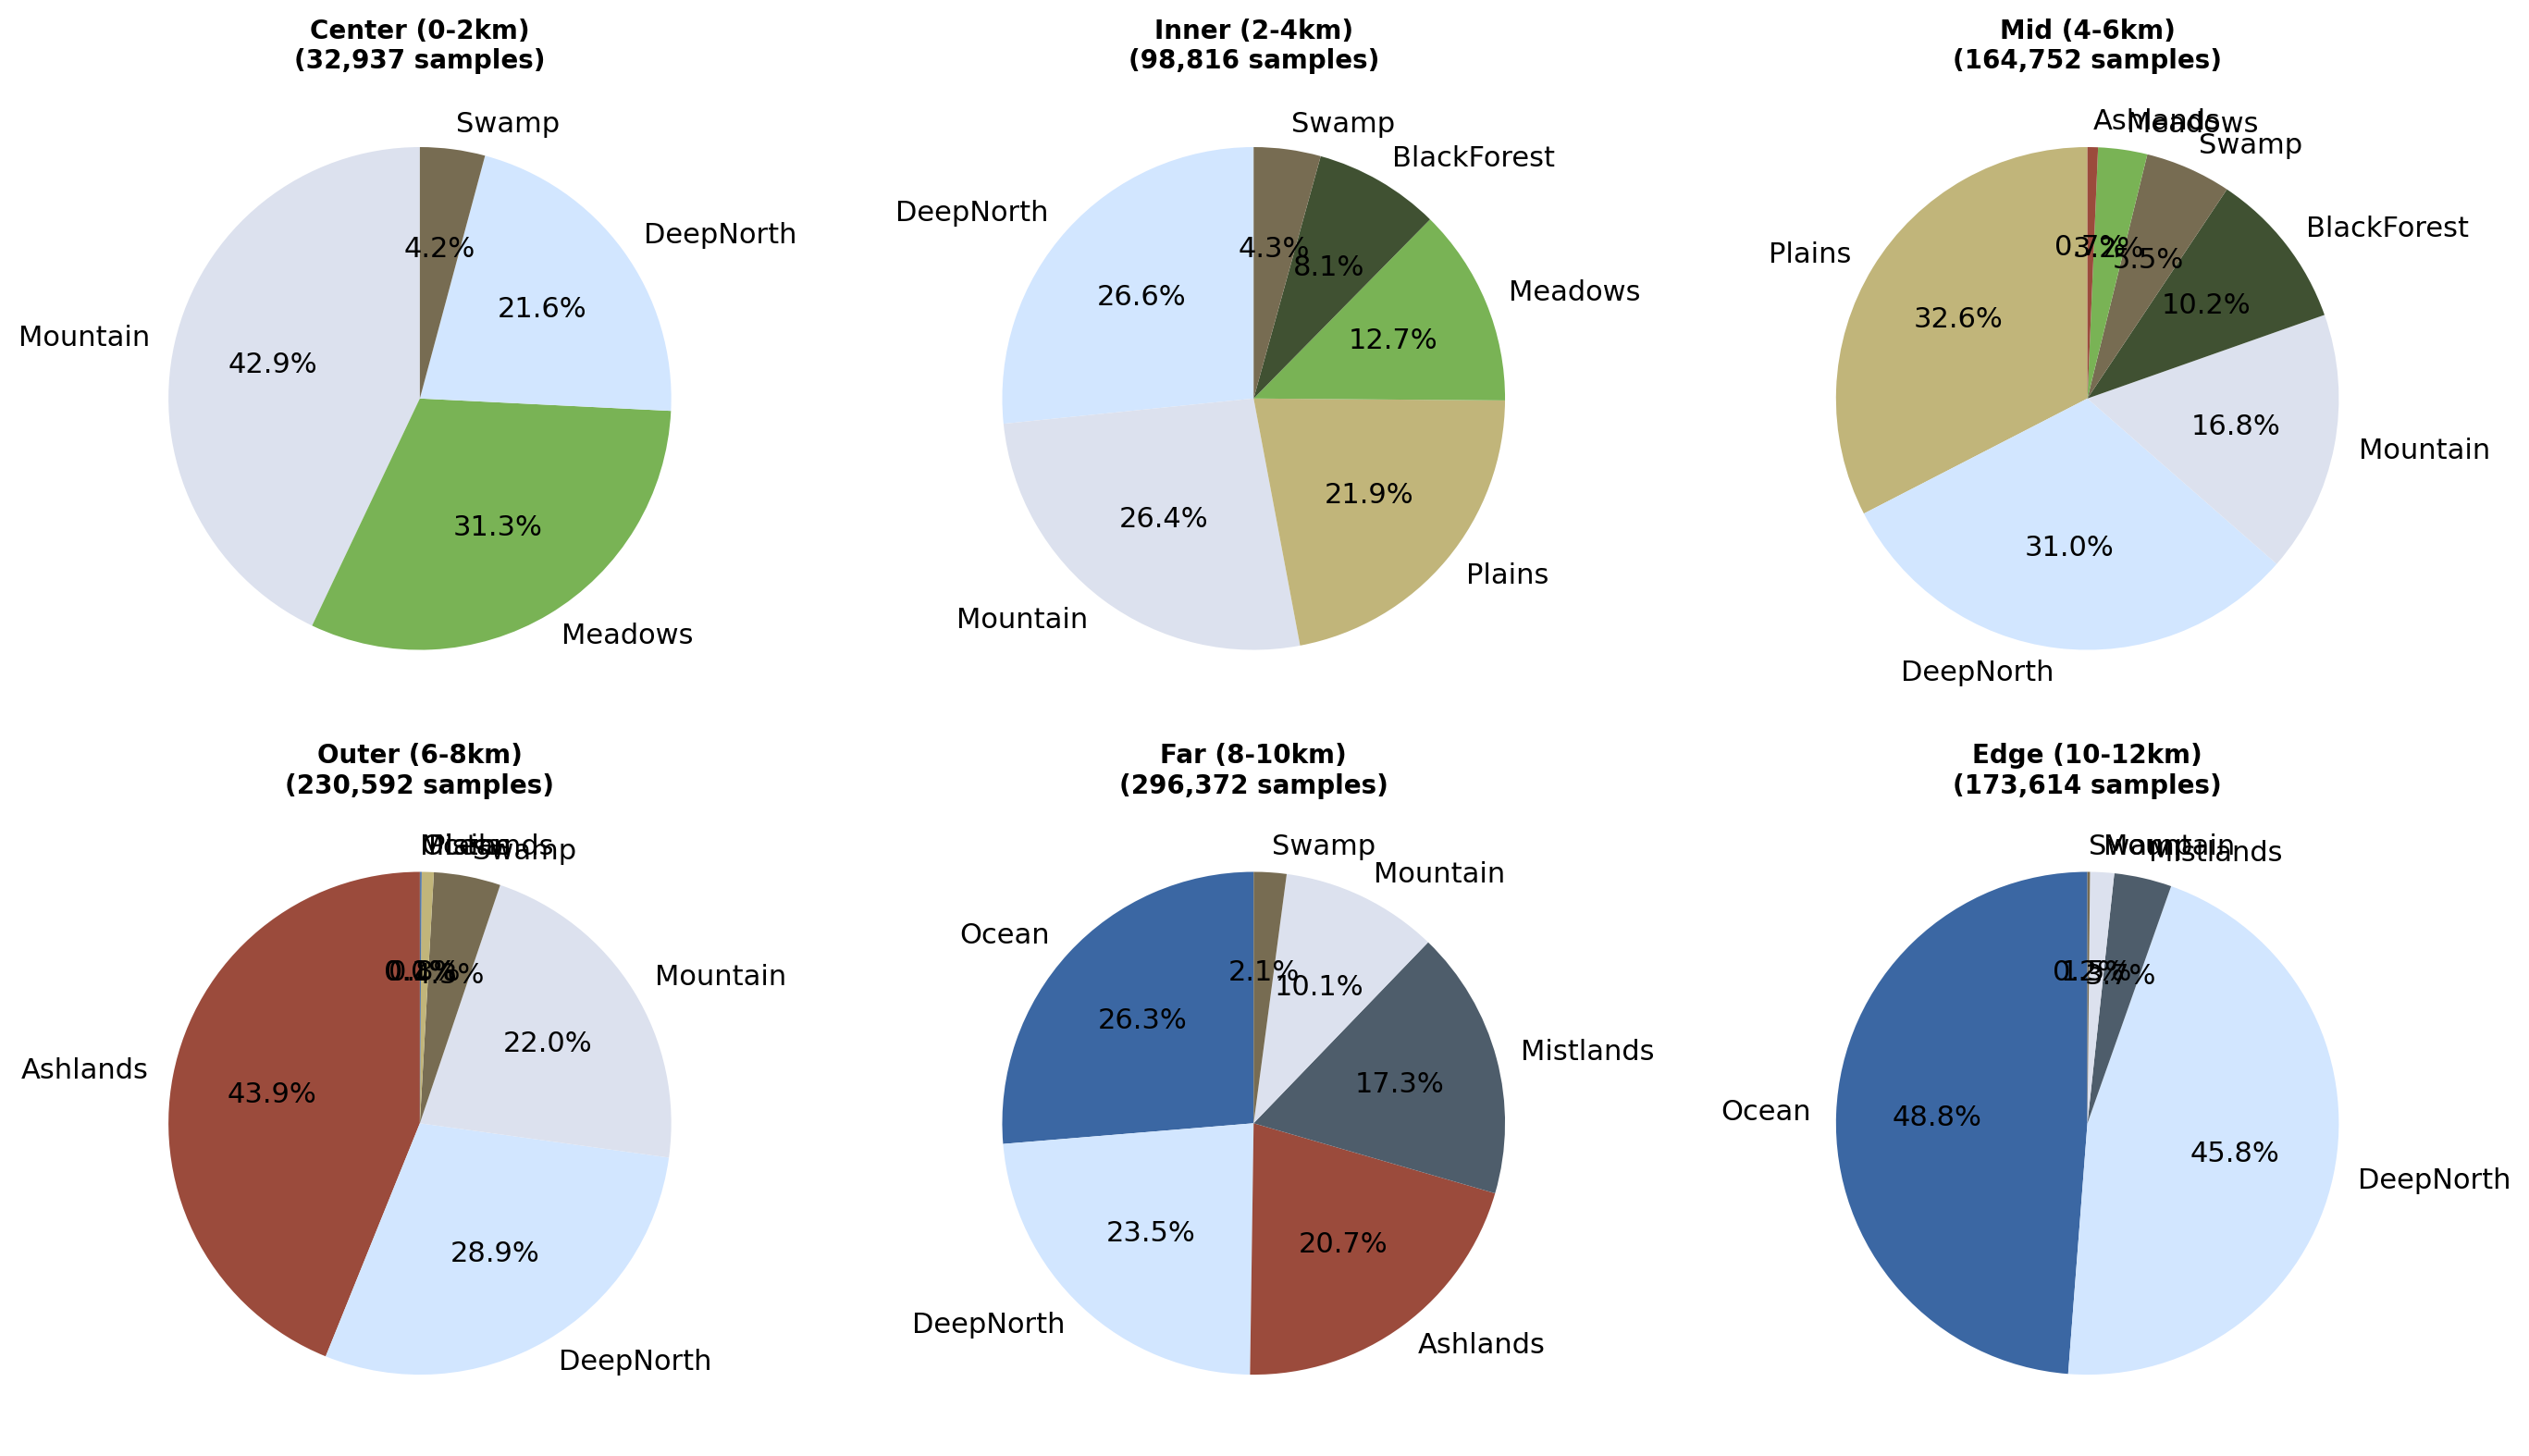

In [11]:
# Analyze biome distribution by distance rings
fig = plot_distance_rings(df)
plt.show()

In [12]:
# Detailed ring statistics
ring_stats = analyze_by_distance_ring(df)

for label, stats in ring_stats.items():
    print(f"\n{label}: {stats['total']:,} samples")
    print("-" * 50)
    for biome, data in sorted(stats['biomes'].items(), key=lambda x: x[1]['percentage'], reverse=True):
        print(f"  {biome:<15} {data['count']:>8,} ({data['percentage']:>5.1f}%)")


Center (0-2km): 32,937 samples
--------------------------------------------------
  Mountain          14,146 ( 42.9%)
  Meadows           10,298 ( 31.3%)
  DeepNorth          7,118 ( 21.6%)
  Swamp              1,375 (  4.2%)

Inner (2-4km): 98,816 samples
--------------------------------------------------
  DeepNorth         26,290 ( 26.6%)
  Mountain          26,042 ( 26.4%)
  Plains            21,658 ( 21.9%)
  Meadows           12,590 ( 12.7%)
  BlackForest        7,988 (  8.1%)
  Swamp              4,248 (  4.3%)

Mid (4-6km): 164,752 samples
--------------------------------------------------
  Plains            53,656 ( 32.6%)
  DeepNorth         51,070 ( 31.0%)
  Mountain          27,726 ( 16.8%)
  BlackForest       16,875 ( 10.2%)
  Swamp              9,113 (  5.5%)
  Meadows            5,198 (  3.2%)
  Ashlands           1,114 (  0.7%)

Outer (6-8km): 230,592 samples
--------------------------------------------------
  Ashlands         101,206 ( 43.9%)
  DeepNorth         66,

## Key Findings

**Based on raw API data analysis:**

1. **Polar Biome Over-representation:**
   - DeepNorth: ~31% of world
   - Ashlands: ~15% of world
   - Combined: ~46% of world (expected: ~15-20%)

2. **Mistlands Starvation:**
   - Only ~5.5% of world
   - Expected: 25-30% (outer ring biome)
   - Problem: Checked AFTER polar biomes in GetBiome()

3. **Outer Ring Analysis (6-10km):**
   - Ashlands dominates (43.9%)
   - DeepNorth second (28.9%)
   - Mistlands nearly absent (0.0%)
   - This is where filters will have most impact

**Next Steps:**
- Notebook 02: Tune sea level threshold
- Notebook 03: Apply polar biome filters
- Notebook 05: Compare filter strategies